## Pymaceuticals: Observations and Insights 

In this study, 249 mice identified with SCC tumor growth were treated through a variety of drug regimens. Over the course of 45 days, tumor development was observed and measured. The purpose of this study was to compare the performance of Pymaceuticals' drug of interest, Capomulin, versus the other treatment regimens. You have been tasked by the executive team to generate all of the tables and figures needed for the technical report of the study. The executive team also has asked for a top-level summary of the study results.

* There was a fairly equal distribution in Female and Male mice for this study. 
* Drug regimen of Capomulin shows to be more effective in reducing the average Tumor Volume in mice over a 45 day period. 
* Of the four regimens (Capomulin, Ramicane, Infubinol, and Ceftamin) only Infubinol had one outlier. 
* Study displayed the Tumor Volume decrease over the period of the study with Capomulin regimen, using mouse (ID m601). 
* The correlation results indicate that the weight of the mouse impact the size of the tumor, so the bigger the mouse the tumor volume also appears to be big in size. 


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

from scipy.stats import linregress


# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"


# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

combined_data= pd.merge(study_results, mouse_metadata, on = "Mouse ID")


# Display the data table for preview

combined_data



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [2]:
# Checking the number of mice.

#total number of mice listed in the merged df: 
total_mice_count = combined_data["Mouse ID"].count()
total_mice_count

#number of unique mice: 
unique_mice_count = len(combined_data["Mouse ID"].unique())
unique_mice_count


print(str(unique_mice_count))


249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = combined_data.loc[combined_data.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
print(duplicate_mice)


['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

# g989 = was the only duplicate Mouse ID result

duplicate_mouseid = combined_data[combined_data["Mouse ID"]== "g989"]

# duplicate_mouseid
print(duplicate_mouseid.count())




Mouse ID              13
Timepoint             13
Tumor Volume (mm3)    13
Metastatic Sites      13
Drug Regimen          13
Sex                   13
Age_months            13
Weight (g)            13
dtype: int64


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# --Removing duplicate mouse data (which is only Mouse ID: g989) 

clean_data = combined_data[combined_data["Mouse ID"]!= "g989"]
clean_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [6]:
# Checking the number of mice in the clean DataFrame.
# new df= clean_data

updated_unique_mice_count = len(clean_data["Mouse ID"].unique())

updated_unique_mice_count



248

## Summary Statistics

In [7]:
# Generate a summary statistics table of: 
# mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to 
# calculate the following properties of each drug regimen: 
#   mean, median, variance, standard deviation, and SEM of the tumor volume. 

summary_data = clean_data[["Drug Regimen", "Tumor Volume (mm3)"]]
groupby_data = summary_data.groupby(["Drug Regimen"])

mean = groupby_data["Tumor Volume (mm3)"].mean() 
median = groupby_data["Tumor Volume (mm3)"].median() 
variance = groupby_data["Tumor Volume (mm3)"].var() 
std_dev = groupby_data["Tumor Volume (mm3)"].std() 
sem = groupby_data["Tumor Volume (mm3)"].sem() 

# note, confirm the # of DrugRegimens: print(clean_data["Drug Regimen"].unique()) 
# Assemble the resulting series into a single summary dataframe.

summary_stat = {
    "Tumor Volume MEAN": mean,
    "Tumor Volume MEDIAN": median,
    "Tumor Volume VARIANCE":variance,
    "Tumor Volume STD DEVIATION": std_dev,
    "Tumor Volume SEM":sem
}

summary_stat_df= pd.DataFrame(summary_stat)
summary_stat_df

,Tumor Volume MEAN,Tumor Volume MEDIAN,Tumor Volume VARIANCE,Tumor Volume STD DEVIATION,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of: 
# mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line



summary_stat2 = clean_data.groupby("Drug Regimen").agg(\
                                                             Tumor_Vol_Mean=('Tumor Volume (mm3)', np.mean),\
                                                             Tumor_Vol_Median=('Tumor Volume (mm3)', np.median),\
                                                             Tumor_Vol_Var=('Tumor Volume (mm3)', np.var),\
                                                             Tumor_Vol_Stdev=('Tumor Volume (mm3)', np.std),\
                                                             Tumor_Vol_SEM=('Tumor Volume (mm3)', st.sem))

summary_stat2

,Tumor_Vol_Mean,Tumor_Vol_Median,Tumor_Vol_Var,Tumor_Vol_Stdev,Tumor_Vol_SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

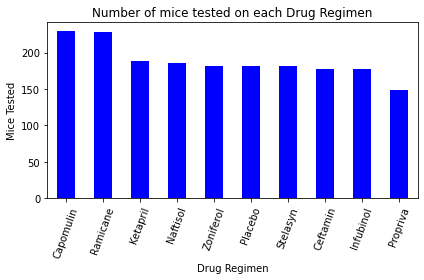

In [9]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.


# df for "Drug Regimen" column values
drug_regimen = clean_data["Drug Regimen"].value_counts()
# print(drug_regimen)

x_axis=drug_regimen 
y_axis=drug_regimen.count


#chart 
drug_regimen.plot(kind="bar", facecolor="blue")

#labels
plt.title("Number of mice tested on each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice Tested")
plt.xticks(rotation=70)
plt.tight_layout()

plt.show()


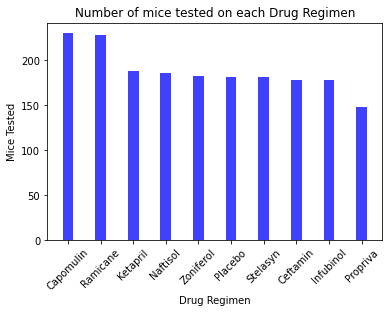

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

# using same df for "Drug Regimen" as above
drug_regimen = clean_data["Drug Regimen"].value_counts()

y_axis=drug_regimen.values
x_axis=np.arange(0,len(y_axis),1)
x_drugs=drug_regimen.index
                 
#Matplotlib
plt.bar(x_drugs, y_axis, color='blue', alpha=0.75, align= "center", width= .33)

#labels 
plt.title("Number of mice tested on each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice Tested")
plt.xticks(rotation=45)
plt.show()


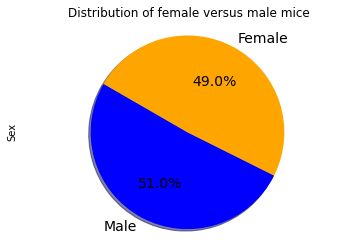

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# dataframe grouping by the 'Sex' Column

gender_count = clean_data["Sex"].value_counts()
# print(gender_count)

gender_count.plot(kind='pie',title="Distribution of female versus male mice", \
                  startangle=150,autopct='%1.1f%%',shadow=True, fontsize=14, colors =["Blue","Orange"],legend =False)
plt.axis("equal")
plt.show()


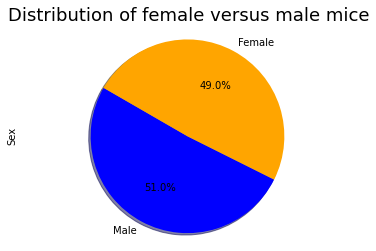

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# using same df as Pie Graph above
gender_count = clean_data["Sex"].value_counts()

#create labels
labels = gender_count.index 

#values of each section
sizes=gender_count.values

#assign colors
colors = ["blue", "orange"]

plt.pie(gender_count, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150)
plt.rcParams['font.size'] = 15
plt.title("Distribution of female versus male mice")
plt.ylabel("Sex")
plt.axis("equal")
plt.show()



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


regimen_4drugs= clean_data[(clean_data["Drug Regimen"] == "Capomulin") | 
                          (clean_data["Drug Regimen"] == "Ramicane") | 
                          (clean_data["Drug Regimen"] == "Infubinol") | 
                          (clean_data["Drug Regimen"] == "Ceftamin")]

# regimen_4drugs_grp = regimen_4drugs.groupby(["Drug Regimen",'Mouse ID'])["Tumor Volume (mm3)" 
# regimen_4drugs_grp.head()

regimen_4drugs_data = regimen_4drugs.groupby(["Drug Regimen","Mouse ID"]).\
aggregate(Tumor_Volume=("Tumor Volume (mm3)",lambda x: x.iloc[-1]))
regimen_4drugs_data.head()




Tumor_Volume
Drug Regimen Mouse ID              
Capomulin    b128         38.982878
             b742         38.939633
             f966         30.485985
             g288         37.074024
             g316         40.159220

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset   
    # Determine outliers using upper and lower bounds
    
    
regimen_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

regimen_4drugs_unstack = regimen_4drugs_data.stack(level=0).unstack(level=0)
regimen_4drugs_unstack.head()


counter = 0
for drug in regimen_list:
    quartiles = regimen_4drugs_unstack[drug].quantile([.25,.5,.75]) 
    lowerq = quartiles[0.25] 
    upperq = quartiles[0.75] 
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    if counter == 0:
        print(f"* Drug Regime {drug} IQR data is:")
    print(f"The lower quartile of {drug} is: {lowerq}")
    print(f"The upper quartile of {drug} is: {upperq}")
    print(f"The interquartile range of {drug} is: {iqr}")
    print(f"Values below {lower_bound} for {drug} could be outliers.")
    print(f"Values above {upper_bound} for {drug} could be outliers.")
    print(f"-----")
    counter += 1
    

* Drug Regime Capomulin IQR data is:
The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
Values below 20.70456164999999 for Capomulin could be outliers.
Values above 51.83201549 for Capomulin could be outliers.
-----
The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
Values below 17.912664470000003 for Ramicane could be outliers.
Values above 54.30681135 for Ramicane could be outliers.
-----
The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
Values below 36.83290494999999 for Infubinol could be outliers.
Values above 82.74144559000001 for Infubinol could be outliers.
-----
The lower quartile of Ceftamin is: 48.72207785
The upper quartile of Ceftamin is: 64.29983003
The interquartile 

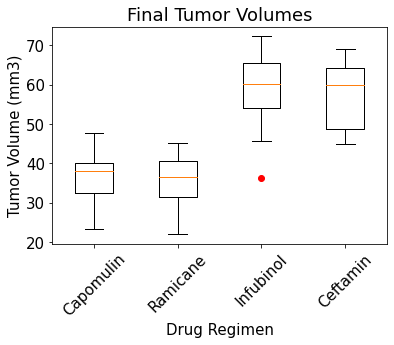

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

box_plot = []
#Note: unstack df contains "NaN" data that must not be plotted

for drug in regimen_list:
    box_plot.append(list(regimen_4drugs_unstack[drug].dropna()))
    
fig1, ax = plt.subplots()
ax.set_title("Final Tumor Volumes by Drug Regimen")
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("Tumor Volume (mm3)")
ax.boxplot(box_plot,notch=0,sym='red')
plt.xticks([1,2,3,4],labels=regimen_list, rotation='45')

plt.title("Final Tumor Volumes")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

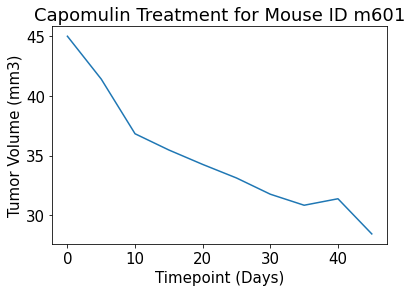

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capomulin_data = clean_data.loc[combined_data['Drug Regimen'] == 'Capomulin']
capomulin_data.tail(20)

# selected Mouse ID m601
mouse_one = clean_data.loc[clean_data['Mouse ID'] == 'm601']
mouse_one

plt.plot(mouse_one["Timepoint"], mouse_one["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment for Mouse ID m601")
plt.show()

#ANALYSIS: it appears the tumor decreased over the period of the study

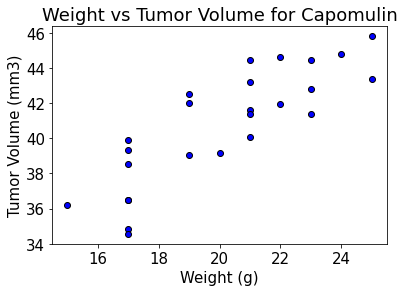

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_mouse_weight = clean_data.loc[combined_data['Drug Regimen'] == 'Capomulin']

capomulin_avg_weight = capomulin_mouse_weight.groupby(["Mouse ID"]).mean()
capomulin_avg_weight

plt.scatter(capomulin_avg_weight["Weight (g)"],
            capomulin_avg_weight["Tumor Volume (mm3)"],
           marker='o',
           facecolors='blue',
           edgecolors='black')
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
plt.show()

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 

correlation = st.pearsonr(capomulin_avg_weight["Weight (g)"], capomulin_avg_weight["Tumor Volume (mm3)"])
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


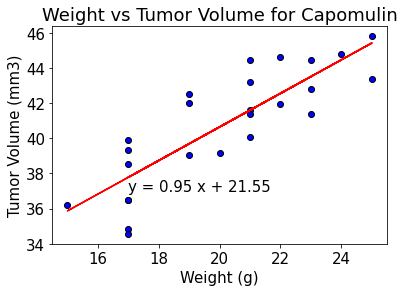

In [19]:
# for mouse weight and average tumor volume for the Capomulin regimen

    # (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(capomulin_avg_weight["Weight (g)"], \
                                                       capomulin_avg_weight["Tumor Volume (mm3)"])
    # regress_values = x_values * slope + intercept
regress_values = capomulin_avg_weight["Weight (g)"] * slope + intercept

    # line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.plot(capomulin_avg_weight["Weight (g)"],regress_values,"r-")
plt.annotate(line_eq,(17,37),fontsize=15,color="black")

plt.scatter(capomulin_avg_weight["Weight (g)"],
            capomulin_avg_weight["Tumor Volume (mm3)"],
            marker='o',
            facecolors='blue',
            edgecolors='black')
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
plt.show()




NOTE - Referenced the following websites for assistance with coding (especially Aggregation Method): 

https://mode.com/python-tutorial/pandas-groupby-and-python-lambda-functions/

https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html

https://pbpython.com/pandas-grouper-agg.html
